In [1]:
"""
笛卡尔坐标下球体重力正演
--------------------------------------------------------------------

`geoist.gravity`模块有许多重磁力正演程序有
展示如何基于笛卡尔坐标系建立球体并获得球体引起的重力及其导数

"""
import matplotlib.pyplot as plt
import numpy as np

from geoist.pfm import sphere, giutils
from geoist import gridder
from geoist.inversion import geometry
from geoist.vis import giplt

In [3]:
# 通过geoist.gridder创建几何对象
# 每个模型元素都有一个属性字典
# 模型数据：创建两个物性相反数据的球体
model = [geometry.Sphere(x=10e3, y=10e3, z=1.5e3, radius=1.5e3,
                       props={'density': 500}),
         geometry.Sphere(x=20e3, y=20e3, z=1.5e3, radius=1.5e3,
                       props={'density': -500})]
# 观测数据：恒定高度，规则网格
shape = (300, 300)
area = [0, 30e3, 0, 30e3]
x, y, z = gridder.regular(area, shape, z=-100)

In [4]:
#计算重力及导数
fields = [
    ['Gravity (mGal)', sphere.gz(x, y, z, model)],
    ['gxx (Eotvos)', sphere.gxx(x, y, z, model)],
    ['gyy (Eotvos)', sphere.gyy(x, y, z, model)],
    ['gzz (Eotvos)', sphere.gzz(x, y, z, model)],
    ['gxy (Eotvos)', sphere.gxy(x, y, z, model)],
    ['gxz (Eotvos)', sphere.gxz(x, y, z, model)],
    ['gyz (Eotvos)', sphere.gyz(x, y, z, model)],
]

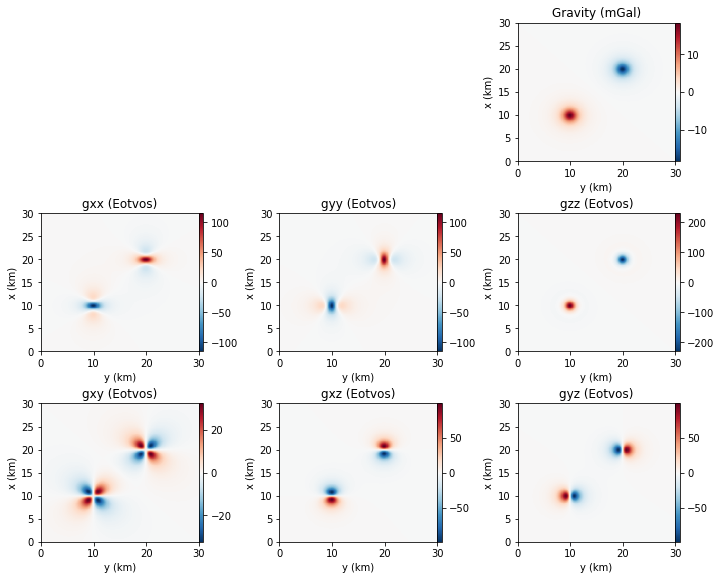

In [6]:
# 画图
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 10
X, Y = x.reshape(shape)/1000, y.reshape(shape)/1000
for i, tmp in enumerate(fields):
    ax = plt.subplot(3, 3, i + 3)
    field, data = tmp
    scale = np.abs([data.min(), data.max()]).max()
    ax.set_title(field)
    plot = ax.pcolormesh(Y, X, data.reshape(shape), cmap='RdBu_r',
                         vmin=-scale, vmax=scale)
    plt.colorbar(plot, ax=ax, aspect=30, pad=0)
    ax.set_xlabel('y (km)')
    ax.set_ylabel('x (km)')
plt.tight_layout(pad=0.5)
plt.show()